In [ ]:
# Install NetworkX, Matplotlib, Pandas, Numpy using pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
from google.colab import drive
drivePath = '/content/drive' #please do not change
drive.mount(drivePath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install the library on your environment
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the library
import wget
import os, pathlib

dataPath = drivePath + '/MyDrive/Colab Notebooks/data/opec-data.csv'
dataPath2 = drivePath + '/MyDrive/Colab Notebooks/data/opec-dataCopy.csv'
datapath3 = drivePath + '/MyDrive/Colab Notebooks/data/three-factor.csv'
datapath4 = drivePath + '/MyDrive/Colab Notebooks/data/airline-distance.csv'
#'Economic and trade cooperation.csv'
datapath5 = drivePath + '/MyDrive/Colab Notebooks/data/Economic and trade cooperation.csv'
datapath6 = drivePath + '/MyDrive/Colab Notebooks/data/OPEC_country.csv'

In [ ]:
df = pd.read_csv(dataPath)
df

,Country,Positive,Negative,Neutral
0,Algeria,1.0,2.0,8.0
1,Angola,1.0,11.0,19.0
2,Congo,12.0,0.0,33.0
3,Equatorial Guinea,29.0,0.0,40.0
4,Gabon,19.0,2.0,6.0
5,Iran,44.0,0.0,41.0
6,Iraq,1.0,6.0,18.0
7,Kuwait,1.0,18.0,42.0
8,Libya,2.0,1.0,9.0
9,Nigeria,12.0,3.0,16.0


In [ ]:
df.drop(df.tail(2).index, inplace=True)

In [ ]:
df

,Country,Positive,Negative,Neutral
0,Algeria,1.0,2.0,8.0
1,Angola,1.0,11.0,19.0
2,Congo,12.0,0.0,33.0
3,Equatorial Guinea,29.0,0.0,40.0
4,Gabon,19.0,2.0,6.0
5,Iran,44.0,0.0,41.0
6,Iraq,1.0,6.0,18.0
7,Kuwait,1.0,18.0,42.0
8,Libya,2.0,1.0,9.0
9,Nigeria,12.0,3.0,16.0


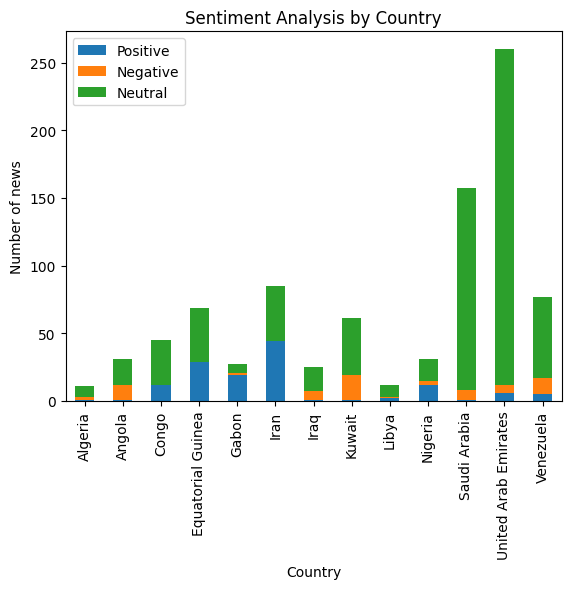

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv(dataPath)

# Group by country and count the number of positive, negative, and neural
grouped_data = df.groupby('Country')[['Positive', 'Negative', 'Neutral']].sum()

# Generate a stacked histogram
grouped_data.plot(kind='bar', stacked=True)

# Set the graph title and axis labels
plt.title('Sentiment Analysis by Country')
plt.xlabel('Country')
plt.ylabel('Number of news')


# show 
plt.show()


As can be seen from the figure, United Arab Emirates has the largest proportion of neutral news, followed by Saudi Arabia. We found that there is only one country with more reports of "support" - Iran, and 11 countries with more reports of "neutral", namely: Algeria, Angola, Congo, Equatorial Guinea, Iraq, Kuwait ,Libya,Nigeria,Saudi Arabia,United Arab Emirates,Venezuela

In [ ]:
df2=pd.read_csv(dataPath2)
df2

,Country,Positive,Negative,Neutral,Others
0,Algeria,1,2,8,10
1,Angola,1,11,19,30
2,Congo,12,0,33,33
3,Equatorial Guinea,29,0,40,40
4,Gabon,19,2,6,8
5,Iran,44,0,41,41
6,Iraq,1,6,18,24
7,Kuwait,1,18,42,60
8,Libya,2,1,9,10
9,Nigeria,12,3,16,19


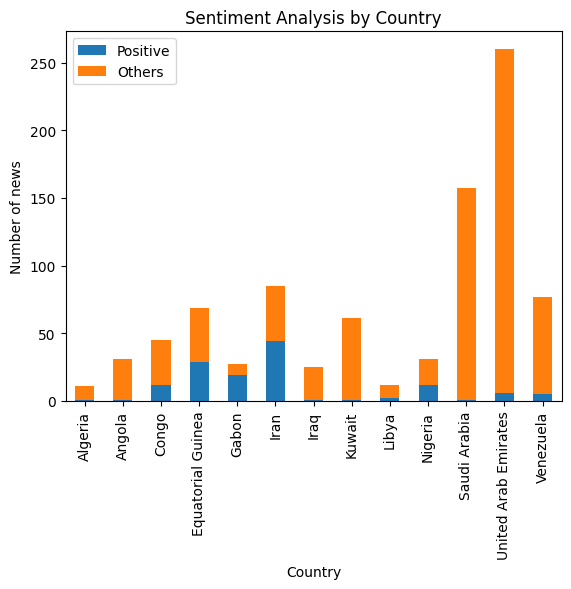

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(dataPath2)

# Group by country and count the number of positive, negative, and neural
grouped_data = df.groupby('Country')[['Positive', 'Others']].sum()

# Generate a stacked histogram
grouped_data.plot(kind='bar', stacked=True)

plt.title('Sentiment Analysis by Country')
plt.xlabel('Country')
plt.ylabel('Number of news')

plt.show()


We found that there are 2 countries with more "positive" reports, namely Iran and Gabon. There are 11 countries with more "others" attitudes, namely: Algeria, Angola, Congo, Equatorial Guinea, Iraq, Kuwait, Libya, Nigeria, Saudi Arabia, United Arab Emirates, and Venezuela.

**相关性可视化部分**

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:               attitude   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.5444
Date:                Sun, 14 May 2023   Prob (F-statistic):              0.476
Time:                        13:35:14   Log-Likelihood:                -2.0038
No. Observations:                  13   AIC:                             8.008
Df Residuals:                      11   BIC:                             9.138
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

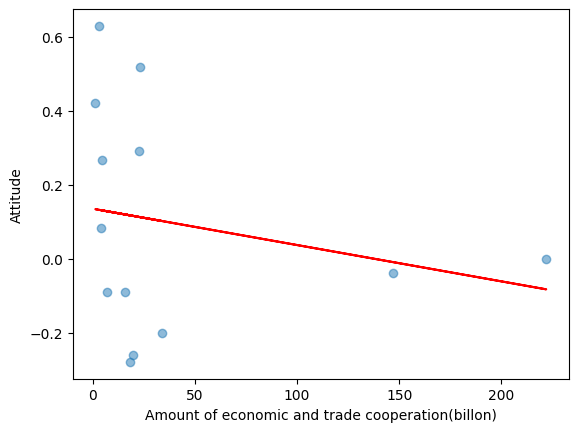

In [ ]:
import statsmodels.api as sm
data = pd.read_csv(datapath3)

# Define the independent and dependent variables
X = data['Amount of economic and trade cooperation']
y = data['attitude']

# Add an intercept entry
X = sm.add_constant(X)

# Build a linear regression model
model = sm.OLS(y, X)

# Perform regression analysis
results = model.fit()

# Output the regression results
print(results.summary())
# Get the F statistic and the p-value
f_statistic = results.fvalue
f_p_value = results.f_pvalue
t = results.tvalues  # Take the t-statistic of the third independent variable
print("t:", t)
print("F-statistic:", f_statistic)
print("F-p-value:", f_p_value)
plt.scatter(data['Amount of economic and trade cooperation'], data['attitude'], alpha=0.5) 
plt.plot(data['Amount of economic and trade cooperation'], results.fittedvalues, color='red') 
plt.xlabel('Amount of economic and trade cooperation(billon)')
plt.ylabel('Attitude')
plt.show()

We conducted a regression analysis on the data of economic trade amount and media attitude, and found that the F statistic was 0.06504678326206385, and the p value corresponding to the F statistic was 0.803395682699059. The F statistic of this regression model is small, and the corresponding p value is large, indicating that the explanatory power of the independent variable is weak to the dependent variable, that is, there is no significant linear relationship between economic trade amount and media attitude, which can also be observed from the scatter chart below.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:               attitude   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.084
Method:                 Least Squares   F-statistic:                   0.06505
Date:                Sun, 14 May 2023   Prob (F-statistic):              0.803
Time:                        13:35:15   Log-Likelihood:                -2.2795
No. Observations:                  13   AIC:                             8.559
Df Residuals:                      11   BIC:                             9.689
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

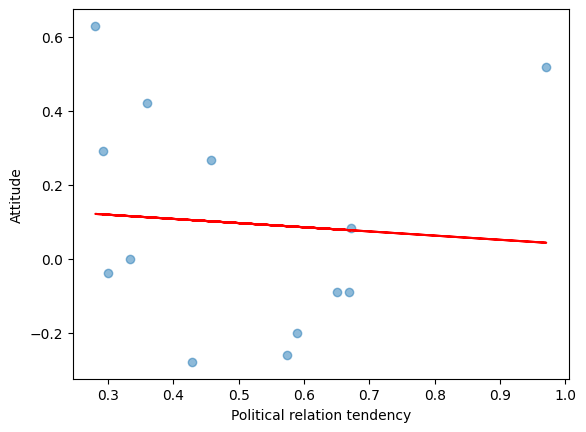

In [ ]:
data = pd.read_csv(datapath3)

# Define the independent and dependent variables
X = data['Political relation tendency']
y = data['attitude']

# Add intercept items
X = sm.add_constant(X)

# Build a linear regression model
model = sm.OLS(y, X)

# Perform regression analysis
results = model.fit()

# Output the regression results
print(results.summary())
# Get the F statistic and the p-value
f_statistic = results.fvalue
f_p_value = results.f_pvalue
t = results.tvalues  # Take the t-statistic of the third independent variable
print("t:", t)
print("F-statistic:", f_statistic)
print("F-p-value:", f_p_value)
plt.scatter(data['Political relation tendency'], data['attitude'], alpha=0.5) 
plt.plot(data['Political relation tendency'], results.fittedvalues, color='red') 
plt.xlabel('Political relation tendency')
plt.ylabel('Attitude')
plt.show()

We conducted a regression analysis on the data of political relation tendency and media attitude, and found that the F statistic is 0.06504678326206385, and the corresponding p value of F statistic is 0.803395682699059. The F statistic is small, and the corresponding p value is large, indicating that the independent variable political relationship tendency has a weak explanatory power on the dependent variable media attitude. We can also see from the scatter plot below that there is no significant linear relationship between the two.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:               attitude   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.079
Method:                 Least Squares   F-statistic:                    0.1197
Date:                Sun, 14 May 2023   Prob (F-statistic):              0.736
Time:                        13:35:15   Log-Likelihood:                -2.2474
No. Observations:                  13   AIC:                             8.495
Df Residuals:                      11   BIC:                             9.625
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0107      0.261      0.041      0.9

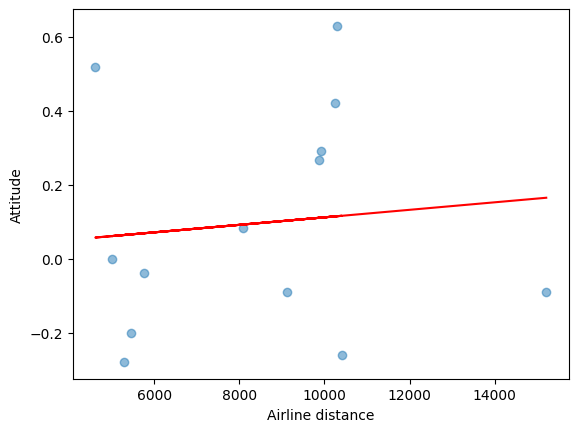

In [ ]:
data = pd.read_csv(datapath3)

# Define the independent and dependent variables
X = data['distance']
y = data['attitude']

# Add intercept items
X = sm.add_constant(X)

# Build a linear regression model
model = sm.OLS(y, X)

# Perform regression analysis
results = model.fit()

# Output the regression results
print(results.summary())
# Get the F statistic and the p-value
f_statistic = results.fvalue
f_p_value = results.f_pvalue
t = results.tvalues  # Take the t-statistic of the third independent variable
print("t:", t)
print("F-statistic:", f_statistic)
print("F-p-value:", f_p_value)
plt.scatter(data['distance'], data['attitude'], alpha=0.5) 
plt.plot(data['distance'], results.fittedvalues, color='red') 
plt.xlabel('Airline distance')
plt.ylabel('Attitude')
plt.show()

We conducted a regression analysis on the data of economic trade amount and media attitude, and found that the F statistic was 0.06504678326206385, and the p value corresponding to the F statistic was 0.803395682699059. The F statistic of this regression model is small, and the corresponding p value is large, indicating that the explanatory power of the independent variable is weak to the dependent variable, that is, there is no significant linear relationship between economic trade amount and media attitude, which can also be observed from the scatter chart below.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:               attitude   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                 -0.232
Method:                 Least Squares   F-statistic:                    0.2474
Date:                Sun, 14 May 2023   Prob (F-statistic):              0.861
Time:                        13:35:16   Log-Likelihood:                -1.8027
No. Observations:                  13   AIC:                             11.61
Df Residuals:                       9   BIC:                             13.87
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

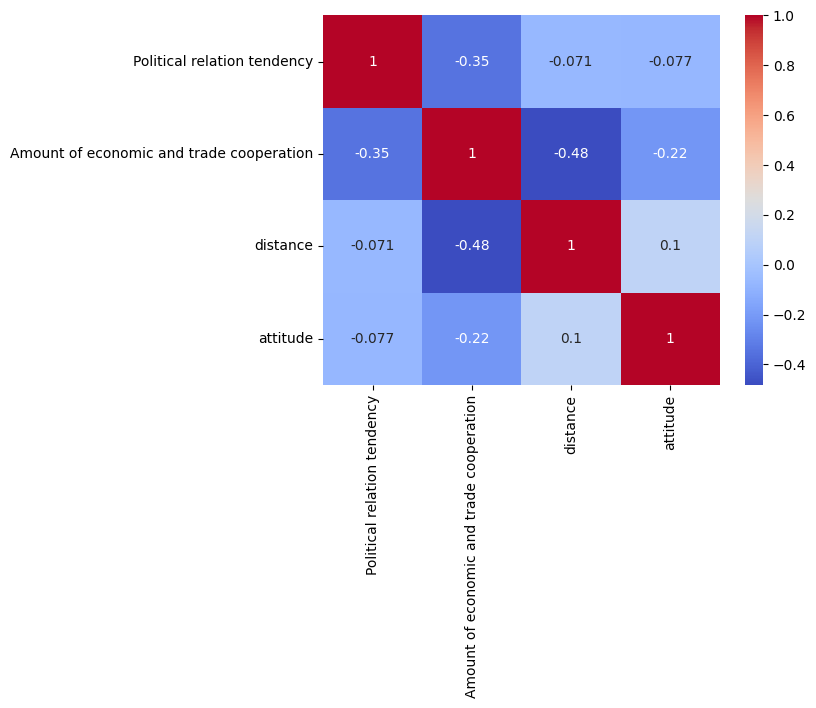

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(datapath3)
# Construct the independent variable X and the dependent variable y
X = df[['Political relation tendency', 'Amount of economic and trade cooperation','distance']]
y = df['attitude']

# Add a constant entry
X = sm.add_constant(X)

# Build multiple linear regression models
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Output the results of the regression analysis
print(results.summary())

# Calculate the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# Draw a heat map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display graphics
plt.show()

We calculate the correlation matrix between the three elements and the media attitude, and draw the heat map. As can be seen from the figure, the correlation between the three elements and the attitude of media is weak, and the tendency of political relationship and the amount of economic trade are weakly negatively correlated with the attitude of media. There is a weak positive correlation between distance and media attitude.

# 航线距离地图可视化

In [ ]:
import folium

In [ ]:
# Read data
dataAir = pd.read_csv(datapath4)

In [ ]:
# Create a map
m = folium.Map(location=[35, 103], zoom_start=3, tiles='cartodbpositron')

# Traverse the dataset to create a corresponding marker for each country
for _, row in dataAir.iterrows():
    # Get the coordinate location and the corresponding route distance
    country = row['Country']
    lat = row['Latitude']
    lon = row['Longitude']
    distance = row['air_line_distance(km)']
    
    # Set the color of the marker based on distance
    if distance < 5000:
        color = 'green'
    elif distance < 8000:
        color = 'orange'
    else:
        color = 'red'
    
    # Create markers and add them to map objects
    folium.Marker([lat, lon],
                  tooltip=f"{country} ({distance} km)",
                  icon=folium.Icon(color=color)).add_to(m)

m.save("world_map.html")
m

In [ ]:
# Create a map and initialize the center point for China
m = folium.Map(location=[35, 103], zoom_start=3, tiles="cartodbpositron")

# Add tags
folium.Marker(location=[35, 103], tooltip="China", icon=folium.Icon(color="red")).add_to(m)

# Traverse the dataset to create markers and lines for each country
for _, row in dataAir.iterrows():
    country = row["Country"]
    lat = row["Latitude"]
    lon = row["Longitude"]
    distance = row["air_line_distance(km)"]

    # Skip China itself
    if country == "China":
        continue

    # Create markers and add them to the map
    folium.Marker(
        location=[lat, lon],
        tooltip=f"{country} ({distance} km)",
        icon=folium.Icon(color="blue", icon="plane")
    ).add_to(m)

    # Create a line and add it to the map
    folium.PolyLine(
        locations=[[35, 103], [lat, lon]],
        color="black",
        tooltip=f"{country}: {distance} km",
        popup=f"{country}: {distance} km"
    ).add_to(m)


m.save("world_map.html")
m

In [ ]:
# Create a map and initialize the center point for China
m = folium.Map(location=[35, 103], zoom_start=3, tiles="Stamen Terrain")

# Add tags
folium.Marker(location=[35, 103], tooltip="China", icon=folium.Icon(color="red")).add_to(m)

# Traverse the dataset to create markers and lines for each country
for _, row in dataAir.iterrows():
    country = row["Country"]
    lat = row["Latitude"]
    lon = row["Longitude"]
    distance = row["air_line_distance(km)"]

    # Skip China itself
    if country == "China":
        continue

    # Create markers and add them to the map
    marker = folium.Marker(
        location=[lat, lon],
        tooltip=f"{country} ({distance} km)",
        icon=folium.Icon(color="blue", icon="plane") 
    ).add_to(m)

    # Create a line and add it to the map
    folium.PolyLine(
        locations=[[35, 103], [lat, lon]],
        color="#b82500",
        weight=1,
        opacity=0.5,
        dash_array="5, 5",
        popup=f"{country}: {distance} km"
    ).add_to(m)

    # A pop-up that adds wire length information on the marker
    folium.Popup(str(distance) + " km", show=True).add_to(marker)

# Add layer controls
folium.LayerControl(position="topright", collapsed=False).add_to(m)


m.save("world_map.html")
m

## 经贸合作条形图

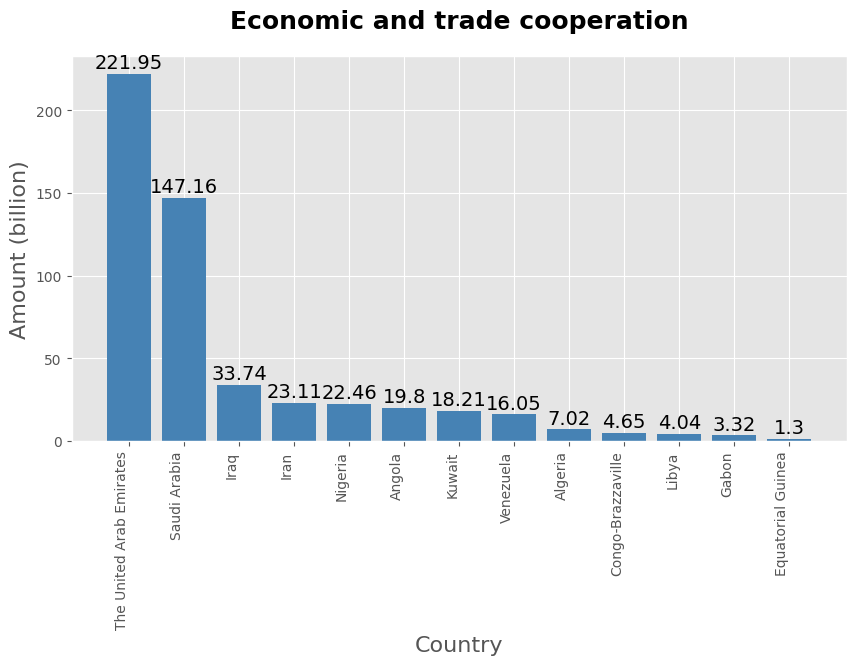

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the chart style
plt.style.use('ggplot')

font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 14}

# Read Data
df = pd.read_csv(datapath5)

# Sort by mean from highest to lowest
df = df.sort_values('mean', ascending=False)

# Create a graph
fig, ax = plt.subplots()

# Draw a bar chart
bar_plot = ax.bar(df['Country'], df['mean'], color='steelblue')

# Set the tilt of the X-axis label
plt.xticks(rotation=90, ha='right')

# Add a title and tags
ax.set_title('Economic and trade cooperation', fontsize = 18, pad=20, fontweight='bold', fontdict=font)
ax.set_xlabel('Country', fontsize=16)
ax.set_ylabel('Amount (billion)', fontsize=16)

# Add labels on each bar chart
for i in range(len(bar_plot)):
    bar_height = bar_plot[i].get_height()
    bar_width = bar_plot[i].get_width()
    bar_x = bar_plot[i].get_x()

    ax.text(bar_x + bar_width/2, bar_height+1, str(round(df['mean'].iloc[i], 2)), ha='center', va='bottom', fontdict=font)

# Sets the drawing size
fig.set_size_inches(10, 5)

plt.show()

## The reporting attitudes of the media in different countries

In [ ]:
df = pd.read_csv(datapath6)
df

,Country,Media,Time,Title,Links,Attitude,Key_words,Distance
0,Algeria,Algérie Presse Service,NaN,找不到相关新闻,NaN,NaN,NaN,9113km
1,Algeria,télévision algérienne,NaN,打不开，禁止访问,NaN,NaN,NaN,NaN
2,Algeria,El Moudjahid,NaN,找不到相关新闻,NaN,NaN,NaN,NaN
3,Algeria,El Watan,01/18/2023,中国：“Covid 零”增长放缓,https://elwatan-dz.com/chine-le-zero-covid-a-d...,middle,NaN,NaN
4,Algeria,NaN,11/07/2022,尽管采取了多次限制措施，但中国的 Covid 仍处于六个月以来的最高水平,https://elwatan-dz.com/le-covid-en-chine-au-pl...,negative,多次封锁扰乱了经济和日常生活,NaN
...,...,...,...,...,...,...,...,...
662,Venezuela,NaN,2021 年 5 月 17 日,25吨中国物资运抵委内瑞拉抗击covid-19,https://www.elnacional.com/venezuela/llegaron-...,donate,NaN,NaN
663,Venezuela,NaN,2021 年 1 月 16 日,蓬佩奥再次指责中国掩盖了covid-19的真正来源,https://www.elnacional.com/mundo/pompeo-acuso-...,middle,NaN,NaN
664,Venezuela,NaN,2020 年 9 月 29 日,中国机器仅需 30 分钟即可完成 covid-19 测试,https://www.elnacional.com/ciencia-tecnologia/...,middle,NaN,NaN
665,Venezuela,NaN,2022 年 12 月 24 日,官方承认，一个中国城市每天记录 50 万例 covid-19 感染,https://www.elnacional.com/mundo/una-ciudad-ch...,negative,中国政府控制着当地媒体，大量互联网审查人员压制被视为政治敏感的内容。,NaN


In [ ]:
country_attitude = df[['Country', 'Attitude']]
country_attitude

,Country,Attitude
0,Algeria,NaN
1,Algeria,NaN
2,Algeria,NaN
3,Algeria,middle
4,Algeria,negative
...,...,...
662,Venezuela,donate
663,Venezuela,middle
664,Venezuela,middle
665,Venezuela,negative


In [ ]:
country_attitude['Attitude'].unique()

array([nan, 'middle', 'negative', 'positive', 'donate', ' middle', ' '],
      dtype=object)

In [ ]:
country_attitude['Attitude'] = country_attitude['Attitude'].str.replace('donate', 'positive')

<ipython-input-42-4527a8e1e155>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
country_attitude['Attitude'].unique()

array([nan, 'middle', 'negative', 'positive', ' middle', ' '],
      dtype=object)

In [ ]:
country_attitude['Attitude'].value_counts()

middle      441
positive    137
negative     68
 middle       1
              1
Name: Attitude, dtype: int64

In [ ]:
#Visualization
import plotly.express as px

counts = country_attitude['Attitude'].value_counts()
fig = px.pie(names=counts.index, values=counts.values)
fig.update_layout(title='Attitude of Country Distribution')

fig.show()